# King County Housing Characteristics

In [1]:
# Add image here of Tableau prices

Using multiple linear regression analysis models to infer the price of homes based on their existing characteristics.

**Business problem:**

King County home sales have been increasing as Seattle continues to grow. Top notch labor and a favorable climate make King County a desirable place to live and work. Our real estate team has been tasked with advising clients on the fair value of their home. When our team lists our client's homes, we want to ensure the price is accurate compared to the market.

The model also guides clients on which features to prioritize for increasing home value. This can include renovation, expanding square footage, or other suggestions within the owners control.

## Data

- 21,597 rows by 21 columns
- CSV Formatted

## Notebook Outline

- Scrub data to handle null values and duplicates
- Add additional features to better infer the price of home based on existing characteristics
- Check for linearity and multicollinearity to make sure that model meets relevant assumptions
- Perform outlier removal methods to better meet the assumptions of the linear regression model
- Provide accompanying visualizations to support and interpret the findings of the model
- Circle back to how the multiple linear regression model supports the recommendations for how prices can be predicted based on existing characteristics

# Scrub Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Descriptions of columns

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Quality of view
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [7]:
# Evaluating if type matches column description

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Date should be a datetime object
- Sqft basement should be an integer, not object

In [8]:
# Make date into datetime object

df['date'] = pd.to_datetime(df['date'])

In [9]:
# Observe summary statistics

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


- ID is a random value so should not be evaluated as a continuous variable
- Price has a large standard deviation and most likely contains outlier values
- Waterfront is a binary variable
- Floors, view, condition, and grade are discrete variables
- Zipcode, latitude, and longitude are not continuous variables


## Handling Null Values

<AxesSubplot:>

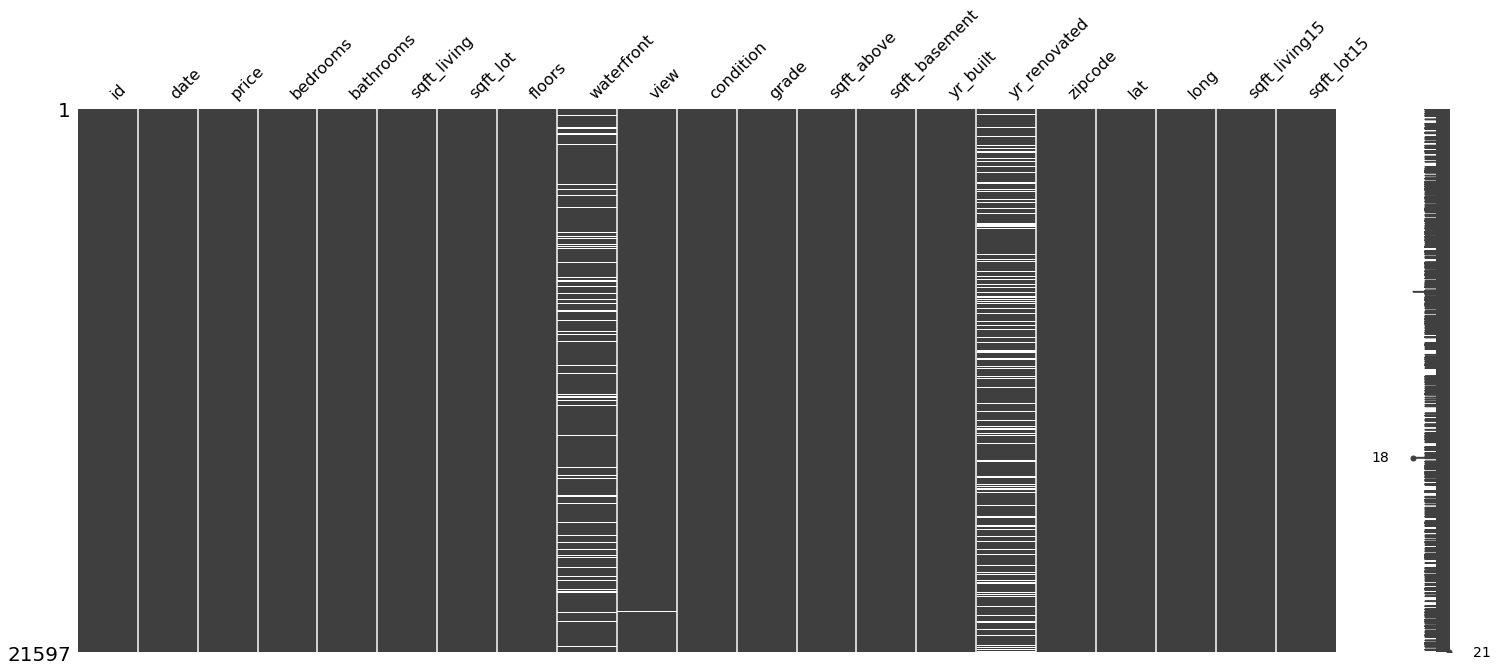

In [16]:
# Visualize which columns contain null values

import missingno
missingno.matrix(df)

Waterfront, view, and yr_renovated contain null values

In [18]:
# Check how many null values are in each column

null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [19]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

### Fill in missing Values for 'view' column

In [25]:
print('Value Counts Normalized')
print(df['view'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['view'].value_counts(dropna=False))

Value Counts Normalized
0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64
------------------------
Value Counts Absolute
0.00    19422
2.00      957
3.00      508
1.00      330
4.00      317
nan        63
Name: view, dtype: int64


Interpreting 'view' as quality of the view from the home. For example, a 4 would be a stunning view, maybe of the mountains or a lake. Can be a beautiful view of the home of nature, or the urban environmnt. A view of 1 would be described as highly undesirable, like looking directly into a neighbor's property, or an unappealing natural characteristic. I have gone ahead and made the assumption that a **nan** represents a value that is missing completely at random. I will use impute_cat to insert a value between 0-4 based on the probability of the original variables distribution
- 90% chance of imputing a 0
- 2% chance of imputing a 1
- 4% of imputing a 2
- 2% of imputing a 3
- 1% of imputing a 4

In [26]:
impute_cat(df, 'view')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0.00,0.00,3,8,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0.00,0.00,3,8,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0.00,0.00,3,7,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,nan,0.00,3,8,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [27]:
# Confirm that there are no more null values in the view column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'yr_renovated' column
Describes when the home was most recently renovated

In [28]:
print('Value Counts Normalized')
print(df['yr_renovated'].value_counts(1, dropna=False))
print('------------------------')
print('Value Counts Absolute')
print(df['yr_renovated'].value_counts(dropna=False))

Value Counts Normalized
0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64
------------------------
Value Counts Absolute
0.00       17011
nan         3842
2014.00       73
2003.00       31
2013.00       31
           ...  
1944.00        1
1948.00        1
1976.00        1
1934.00        1
1953.00        1
Name: yr_renovated, Length: 71, dtype: int64


Most of the values in yr_renovated are either 0 or nan

In [38]:
df[df['yr_renovated']>0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,744.00,744.00,744.00,744.00,744.00,744.00,744.00,652.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00,744.00
mean,4418716401.67,768901.89,3.46,2.31,2327.38,16215.53,1.50,0.04,0.60,3.22,7.75,1878.72,1939.46,1995.93,98095.62,47.58,-122.26,1988.88,13390.77
std,2908265353.00,627125.79,1.07,0.90,1089.00,38235.31,0.49,0.21,1.21,0.52,1.20,849.44,22.09,15.60,54.86,0.12,0.13,715.44,26213.65
min,3600057.00,110000.00,1.00,0.75,520.00,1024.00,1.00,0.00,0.00,1.00,4.00,520.00,1900.00,1934.00,98001.00,47.20,-122.50,828.00,1281.00
25%,1922984893.00,412250.00,3.00,1.75,1560.00,5000.00,1.00,0.00,0.00,3.00,7.00,1267.50,1921.00,1987.00,98040.00,47.52,-122.36,1460.00,5000.00
50%,3899100167.50,607502.00,3.00,2.25,2200.00,7375.00,1.50,0.00,0.00,3.00,8.00,1730.00,1941.50,2000.00,98112.00,47.60,-122.29,1850.00,7455.00
75%,7014200237.50,900000.00,4.00,2.75,2872.50,12670.75,2.00,0.00,0.00,3.00,8.00,2300.00,1955.00,2007.25,98126.00,47.67,-122.21,2380.00,10925.75
max,9829200250.00,7700000.00,11.00,8.00,12050.00,478288.00,3.00,1.00,4.00,5.00,13.00,8570.00,2003.00,2015.00,98199.00,47.78,-121.36,5500.00,310582.00


The most recent renovation took place in 2015. The oldest recorded renovation was in 1934

In [39]:
# Going to assume that a null value means that the home has never been renovated
# This is equivalent to a 0 which is why I am filling null values with 0

df['yr_renovated'].fillna(0, inplace=True)

In [40]:
# Confirm that there are no more null values in the yr_renovated column

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Fill in missing Values for 'waterfront' column
Waterfront is a binary variable. 1 means the home has a view of the water. 0 means the home does not have a view of the water
- Based on national home prices, waterfront properties tend to be more expensive than non-waterfront homes. People appreciate the view of the ocean, or a lake, and enjoy easy access to bodies of water especially during the summer
- I'd like to explore if homes prices at greater than $1,000,000 are more likely to have a waterfront view
- I can then use this finding to subset the data based on a home prices threshold and impute the missing waterfront variables with more accuracy

In [45]:
# Check if mean of price is greater for homes with waterfront views

df.groupby('waterfront')[['price', 'view']].mean()

,price,view
waterfront,,
0.00,532641.99,0.20
1.00,1717214.73,3.76


As expected, waterfront homes have a greater mean price than non-waterfront homes. Their view score is also much higher because the proximity to water. It is easier to see the ocean, lake, or river which enhances the view score as it is a desirable natural feature

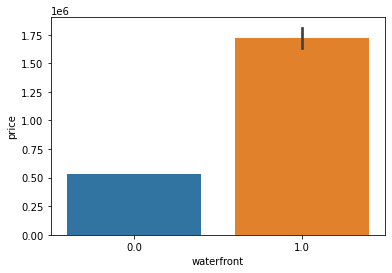

In [47]:
import seaborn as sns

sns.barplot(data=df, x='waterfront', y='price', ci=68);

Clearly, waterfront homes are more expensive than non-waterfront homes

In [49]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [51]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


- 7.3% of homes priced over \$1 million have waterfront views
- 0.02% of homes priced under \$1 million have waterfront views
- As a result, I am going to subset the data by a \$1 million threshold limit and then impute the missing variables. The reason I am doing this is because the more expensive homes are far more likely to have waterfront views and I don't want them to have the same probability of being assigned a waterfront view. 

In [52]:
# Subset the data into two slices based on $1 million threshold

df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [53]:
# Use impute_cat on homes over $1,000,000

df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [54]:
# Simply fill the missing waterfront values with 0 for homes under $1,000,000 because the
# probability of them having a waterfront view is far lower

df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-54-3a74373b56b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [55]:
# Join the data back together

df=pd.concat([df_1mminus, df_1mplus])

In [57]:
# Confirm there are no more missing values

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Missing values are handled, next step is to address duplicate values

# Exploratory Data Analysis

- Explore the distribution of each variable and their relationship with price
- Determine if variables are discrete or continuious
- Determine if variables are categoric or numeric

In [14]:
def distr_(df, col):
    """
    Produces a boxplot, scatterplot, and histogram/kde
    Produces summary statistics
    """
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()

In [ ]:
# Not checking ID, 

eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')